<a href="https://colab.research.google.com/github/Shivachikkonda02/Deep-Learning-CNN-Project/blob/main/CNN.MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mplmg

In [45]:
# Load Dataset

(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [7]:
np.isnan(X_train).any()

False

In [8]:
np.isnan(X_train).sum()

0

In [9]:
np.isnan(X_test).any()

False

In [11]:
X_train.shape

(60000, 28, 28)

In [14]:
X_train=X_train.reshape(X_train.shape[0],
                        X_train.shape[1],
                        X_train.shape[2],1 )
X_train=X_train/255.0

In [24]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [16]:
X_test=X_test.reshape(X_test.shape[0],
                      X_test.shape[1],
                      X_test.shape[2],1)
X_test=X_test/255.0

In [17]:
# Label Encoding

#y_train=tf.one_hot(y_train.astype(np.int32),depth=10)

In [19]:
#y_test=tf.one_hot(y_test.astype(np.int32),depth=10)

In [42]:
print(y_train)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]], shape=(60000, 10), dtype=float32)


In [21]:
y_test

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>

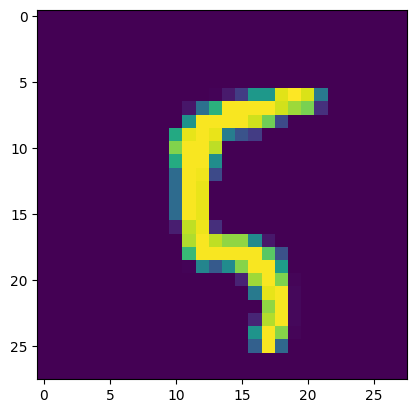

In [23]:
# visualize the data
plt.imshow(X_train[100])
y_train[100]

In [25]:
from tensorflow import keras

In [30]:
model=keras.models.Sequential([
    keras.layers.Conv2D(32,(5,5),padding='same',activation='relu',input_shape=[28,28,1]),
    keras.layers.Conv2D(32,(5,5),padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='relu'),

])


model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
# Fit training data

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.995):
      print("\Reached 99.5% accuracy so cancelling training")
      self.model.stop_training=True

callbacks=myCallback()

In [46]:
history=model.fit(X_train,y_train,
                  batch_size=64,
                  epochs=5,
                  validation_split=0.1,
                  callbacks=[callbacks]
                  )

Epoch 1/5
844/844 [==============================] - 365s 432ms/step - loss: 12.5950 - accuracy: 0.1943 - val_loss: 2.3026 - val_accuracy: 1.0000
Epoch 2/5
844/844 [==============================] - 354s 420ms/step - loss: 12.1852 - accuracy: 0.1300 - val_loss: 14.4257 - val_accuracy: 0.0000e+00
Epoch 3/5
844/844 [==============================] - 353s 419ms/step - loss: 12.6705 - accuracy: 0.1074 - val_loss: 14.4257 - val_accuracy: 0.0000e+00
Epoch 4/5
844/844 [==============================] - 364s 431ms/step - loss: 10.7185 - accuracy: 0.3077 - val_loss: 2.3026 - val_accuracy: 1.0000
Epoch 5/5
844/844 [==============================] - 520s 616ms/step - loss: 9.2786 - accuracy: 0.4329 - val_loss: 2.3026 - val_accuracy: 1.0000


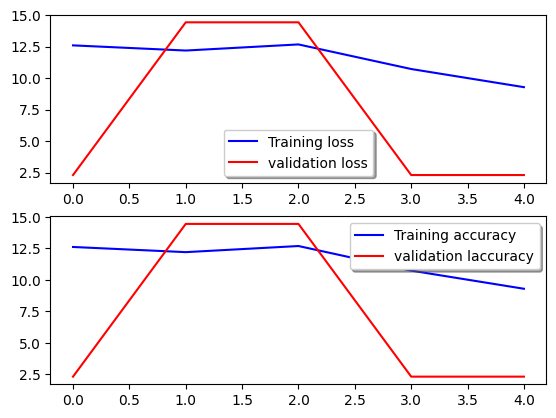

In [51]:
#loss and accuracy

fig,ax=plt.subplots(2,1)
ax[0].plot(history.history['loss'],color='b',label='Training loss')
ax[0].plot(history.history['val_loss'],color='r',label='validation loss',axes=ax[0])
legend=ax[0].legend(loc='best',shadow=True)

ax[1].plot(history.history['loss'],color='b',label='Training accuracy')
ax[1].plot(history.history['val_loss'],color='r',label='validation laccuracy',axes=ax[1])
legend=ax[1].legend(loc='best',shadow=True)

In [52]:
test_loss,test_acc=model.evaluate(X_test,y_test)

313/313 [==============================] - 18s 59ms/step - loss: 2.3026 - accuracy: 1.0000


In [58]:
# predict the values from the testing datset
y_pred= model.predict(X_test)

#convert prediction classes to one hot vectors
#y_pred_classes=np.argmax(y_pred,axis=1)

#converting testing observation to one hot vectors
#y_true=np.argmax(y_test,axis=1)



313/313 [==============================] - 23s 72ms/step
